In [20]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\CSV files'

In [21]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [82]:
#importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('Tuam_LAP_2018_2024.csv')

In [84]:
df.head()

,ZONING,STATUS,TOWN,PLAN_NAME,MyPlan_GZT,Shape__Area,Shape__Length
0,Agriculture,ADOPTED,Tuam,Tuam LAP 2018 - 2024,P1,8071.829132,438.806860
1,Residential Existing,ADOPTED,Tuam,Tuam LAP 2018 - 2024,R2.6,9628.095001,586.563510
2,Open Space/Recreation & Amenity,ADOPTED,Tuam,Tuam LAP 2018 - 2024,G1,368.572174,74.035392
3,Residential Existing,ADOPTED,Tuam,Tuam LAP 2018 - 2024,R2.6,7147.059723,511.879104
4,Open Space/Recreation & Amenity,ADOPTED,Tuam,Tuam LAP 2018 - 2024,G1,2205.868378,194.559707


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ZONING         532 non-null    object 
 1   STATUS         532 non-null    object 
 2   TOWN           532 non-null    object 
 3   PLAN_NAME      532 non-null    object 
 4   MyPlan_GZT     532 non-null    object 
 5   Shape__Area    532 non-null    float64
 6   Shape__Length  532 non-null    float64
dtypes: float64(2), object(5)
memory usage: 29.2+ KB


In [86]:
df.describe()

,Shape__Area,Shape__Length
count,532.000000,532.000000
mean,25292.066556,940.613530
std,70911.386533,4176.065793
min,29.555084,27.703223
25%,1652.420212,213.399064
50%,5160.957794,438.416368
75%,16248.283820,838.567378
max,720108.716200,92302.395570


In [87]:
df.ZONING.value_counts()

Residential Existing               182
Open Space/Recreation & Amenity    155
Rivers and Streams                  38
Agriculture                         31
Town Centre / Commercial            24
Transport Infrastructure            20
Residential (Phase 1)               15
Industrial                          14
Community Facilities                13
Commercial / Mixed Use              13
Business and Enterprise             12
Residential (Phase 2)               12
Public Utility                       2
Business and Technology Park         1
Name: ZONING, dtype: int64

In [88]:
df.isnull().sum()

ZONING           0
STATUS           0
TOWN             0
PLAN_NAME        0
MyPlan_GZT       0
Shape__Area      0
Shape__Length    0
dtype: int64

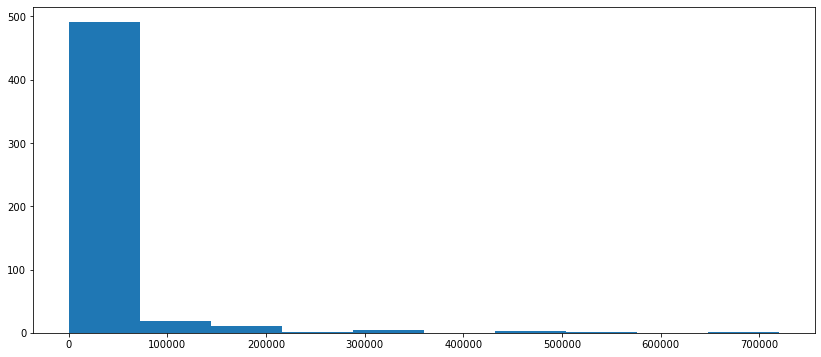

In [92]:
plt.figure(figsize=(14,6))
plt.hist(df['Shape__Area'])
plt.show()

In [109]:
#standardizing the data
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [121]:
# Exploratory Data Analysis with pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title = 'Pandas Profiling Report',explorative = True)

In [122]:
profile.to_widgets()

In [123]:
df['ZONING'] = df.ZONING

In [124]:
df.head()

,ZONING,STATUS,TOWN,PLAN_NAME,MyPlan_GZT,Shape__Area,Shape__Length
0,Agriculture,ADOPTED,Tuam,Tuam LAP 2018 - 2024,P1,8071.829132,438.806860
1,Residential Existing,ADOPTED,Tuam,Tuam LAP 2018 - 2024,R2.6,9628.095001,586.563510
2,Open Space/Recreation & Amenity,ADOPTED,Tuam,Tuam LAP 2018 - 2024,G1,368.572174,74.035392
3,Residential Existing,ADOPTED,Tuam,Tuam LAP 2018 - 2024,R2.6,7147.059723,511.879104
4,Open Space/Recreation & Amenity,ADOPTED,Tuam,Tuam LAP 2018 - 2024,G1,2205.868378,194.559707


In [127]:
# converting the zoning column in dummy variables in order to get numeric values
dummies = pd.get_dummies(df.ZONING)
dummies.head()

,Agriculture,Business and Enterprise,Business and Technology Park,Commercial / Mixed Use,Community Facilities,Industrial,Open Space/Recreation & Amenity,Public Utility,Residential (Phase 1),Residential (Phase 2),Residential Existing,Rivers and Streams,Town Centre / Commercial,Transport Infrastructure
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [128]:
#merging the new columns into the main dataset
merged = pd.concat([df,dummies],axis = 'columns')
merged

,ZONING,STATUS,TOWN,PLAN_NAME,MyPlan_GZT,Shape__Area,Shape__Length,Agriculture,Business and Enterprise,Business and Technology Park,...,Community Facilities,Industrial,Open Space/Recreation & Amenity,Public Utility,Residential (Phase 1),Residential (Phase 2),Residential Existing,Rivers and Streams,Town Centre / Commercial,Transport Infrastructure
0,Agriculture,ADOPTED,Tuam,Tuam LAP 2018 - 2024,P1,8071.829132,438.806860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Residential Existing,ADOPTED,Tuam,Tuam LAP 2018 - 2024,R2.6,9628.095001,586.563510,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Open Space/Recreation & Amenity,ADOPTED,Tuam,Tuam LAP 2018 - 2024,G1,368.572174,74.035392,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Residential Existing,ADOPTED,Tuam,Tuam LAP 2018 - 2024,R2.6,7147.059723,511.879104,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Open Space/Recreation & Amenity,ADOPTED,Tuam,Tuam LAP 2018 - 2024,G1,2205.868378,194.559707,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Town Centre / Commercial,ADOPTED,Tuam,Tuam LAP 2018 - 2024,M2,10716.891480,621.194279,0,0,0,...,0,0,0,0,0,0,0,0,1,0
528,Residential Existing,ADOPTED,Tuam,Tuam LAP 2018 - 2024,R2.6,100121.517700,3464.784850,0,0,0,...,0,0,0,0,0,0,1,0,0,0
529,Residential Existing,ADOPTED,Tuam,Tuam LAP 2018 - 2024,R2.6,21437.041410,873.445664,0,0,0,...,0,0,0,0,0,0,1,0,0,0
530,Transport Infrastructure,ADOPTED,Tuam,Tuam LAP 2018 - 2024,N1.5,562870.417400,92302.395570,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
final = merged.drop(['ZONING','STATUS','TOWN','PLAN_NAME','MyPlan_GZT'],axis = 'columns')
final.head()

,Shape__Area,Shape__Length,Agriculture,Business and Enterprise,Business and Technology Park,Commercial / Mixed Use,Community Facilities,Industrial,Open Space/Recreation & Amenity,Public Utility,Residential (Phase 1),Residential (Phase 2),Residential Existing,Rivers and Streams,Town Centre / Commercial,Transport Infrastructure
0,8071.829132,438.806860,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9628.095001,586.563510,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,368.572174,74.035392,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,7147.059723,511.879104,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2205.868378,194.559707,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [132]:
#implementing the Linear Regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [134]:
X = final.drop('Shape__Area',axis = 'columns')
X

,Shape__Length,Agriculture,Business and Enterprise,Business and Technology Park,Commercial / Mixed Use,Community Facilities,Industrial,Open Space/Recreation & Amenity,Public Utility,Residential (Phase 1),Residential (Phase 2),Residential Existing,Rivers and Streams,Town Centre / Commercial,Transport Infrastructure
0,438.806860,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,586.563510,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,74.035392,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,511.879104,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,194.559707,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,621.194279,0,0,0,0,0,0,0,0,0,0,0,0,1,0
528,3464.784850,0,0,0,0,0,0,0,0,0,0,1,0,0,0
529,873.445664,0,0,0,0,0,0,0,0,0,0,1,0,0,0
530,92302.395570,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [137]:
y = final.Shape__Area
y

0        8071.829132
1        9628.095001
2         368.572174
3        7147.059723
4        2205.868378
           ...      
527     10716.891480
528    100121.517700
529     21437.041410
530    562870.417400
531    176857.981100
Name: Shape__Area, Length: 532, dtype: float64

In [138]:
model.fit(X,y)

LinearRegression()

In [146]:
# when the shape length is 194.559707 in zone business enterprise
model.predict([(194.559707,0,1,0,0,0,0,0,0,0,0,0,0,0,0)])

array([15172.11297243])

In [149]:
model.predict([(511.879104,0,0,0,0,0,0,0,0,0,0,1,0,0,0)])

array([64538.92258701])

In [151]:
model.score(X,y)

0.5405222581607847

In [154]:
model.predict([(586.563510,0,0,0,0,0,1,0,0,0,0,0,0,0,0)])

array([65122.53003155])